# **Previsão de Doenças Cardíacas**

**Objetivo**
* Criar um algoritmo de machine learning capaz de prever se uma pessoas tem alguma doença cardíaca ou não.

### **1. Introdução**

<p align="justify">
As doenças cardíacas são uma das principais causas de morbidade e mortalidade em todo o mundo, representando um desafio significativo para a saúde pública. Neste projeto, embarcaremos em uma jornada que combina a ciência dos dados com a medicina, com o objetivo de desenvolver um modelo de machine learning que possa prever, com precisão, se uma pessoa é propensa a desenvolver doenças cardíacas.

<p align="justify">
A regressão logística é uma ferramenta poderosa neste contexto, pois nos permite abordar um problema de classificação binária, determinando se um indivíduo tem ou não doenças cardíacas com base em uma série de variáveis explicativas. Essas variáveis podem incluir informações como idade, gênero, histórico médico, pressão sanguínea, níveis de colesterol e outros fatores relevantes para a saúde cardíaca.

In [1]:
# Carregando bibliotecas

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [2]:
# Estilo dos gráficos
sns.set()

In [3]:
# Carregando base de dados

dados = pd.read_csv('/content/drive/MyDrive/Ciência de Dados com Python/Projetos/Dados/Heart_Disease_Dataset.csv', sep = ',')

In [4]:
# Visualizando dados

dados.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### **2. Análise Exploratória de Dados**

In [5]:
# Informação sobre os dados

dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
# Estatística descritiva dos dados

dados.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
# Verificando variável target

dados['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [8]:
# Verificando a existência de valores faltantes

dados.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

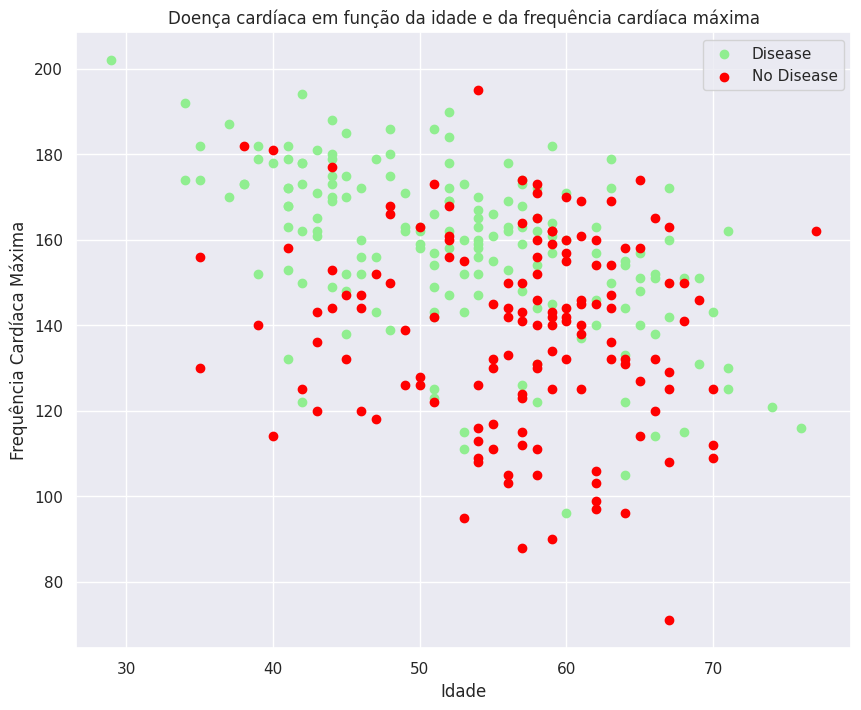

In [9]:
# Analisando a existência de doênças cardíacas de acordo com a frequência cardíaca máxima

## Configurando tamanho da figura
plt.figure(figsize = (10, 8))

## Configurado gráfico
plt.scatter(dados['age'][dados['target'] == 1],
            dados['thalach'][dados['target'] == 1],
            c = "lightgreen")

plt.scatter(dados['age'][dados['target'] == 0],
            dados['thalach'][dados['target'] == 0],
            c = "red")

## Adicionando informações ao gráfico
plt.title("Doença cardíaca em função da idade e da frequência cardíaca máxima")
plt.xlabel("Idade")
plt.ylabel("Frequência Cardíaca Máxima")
plt.legend(["Disease", "No Disease"]);

In [10]:
# Correlação entre as variáveis

dados.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


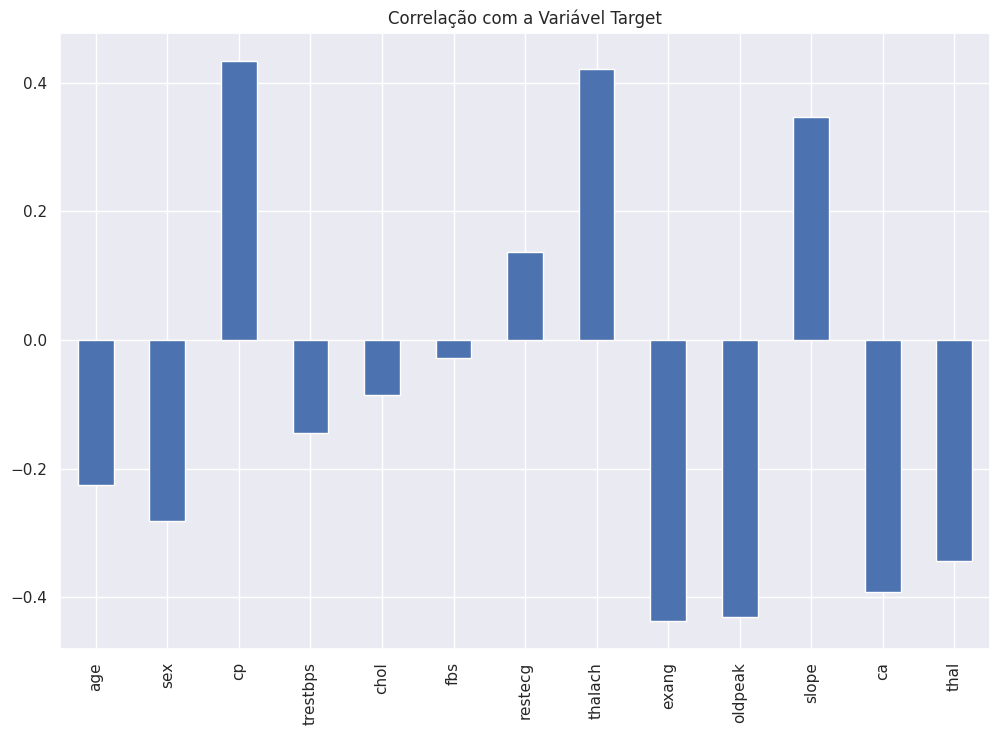

In [11]:
# Correlação das variáveis com a variável target

dados.drop('target', axis = 1).corrwith(dados.target).plot(kind = 'bar',
                                                           grid = True,
                                                           figsize = (12, 8),
                                                           title = "Correlação com a Variável Target");

**Observações**
* Com excessão das variáveis fbs e chol, todas as outras variáveis apresentam uma correlação significativa, seja ela positiva ou não, com a variável target.

### **3. Pré-Processamento de Dados**

In [12]:
# Escalonando dados

## Instânciando objeto
scaler = StandardScaler()

## Selecionando colunas
colunas = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

## Aplicando escalonamentos
dados[colunas] = scaler.fit_transform(dados[colunas])

In [13]:
# Separando os dados em previsores e classe

previsores = dados.drop('target', axis = 1)
classes = dados['target']

In [14]:
# Dividindo os dados em treino e teste

X_treino, X_teste, y_treino, y_teste = train_test_split(previsores,
                                                        classes,
                                                        test_size = 0.3,
                                                        random_state = 0)

In [15]:
# Shape dos dados

print(X_treino.shape)
print(y_treino.shape)
print(X_teste.shape)
print(y_teste.shape)

(212, 13)
(212,)
(91, 13)
(91,)


### **4. Construindo o Modelo**

In [16]:
# Instânciando o modelo

modelo = LogisticRegression()

In [17]:
# Treinando o modelo

modelo.fit(X_treino, y_treino)

LogisticRegression()

In [18]:
# Aplicando aos dados de teste

y_predito = modelo.predict(X_teste)

### **5. Avaliando o Modelo**

In [19]:
# Métricas do Modelo

print(classification_report(y_teste, y_predito))

              precision    recall  f1-score   support

           0       0.86      0.73      0.79        44
           1       0.78      0.89      0.83        47

    accuracy                           0.81        91
   macro avg       0.82      0.81      0.81        91
weighted avg       0.82      0.81      0.81        91



In [20]:
# Acurácia do modelo

accuracy_score(y_teste, y_predito)

0.8131868131868132

### **6. Considerações Finais**

<p align="justify">
Este projeto visava desenvolver um modelo de machine learning baseado em regressão logística para prever se as pessoas têm ou não doenças cardíacas usando o conjunto de dados "Heart Disease". O desempenho do modelo foi avaliado com base em métricas como precisão (precision), recall, F1-score e acurácia.

<p align="justify">
O modelo de regressão logística obteve um desempenho global satisfatório, com uma precisão média ponderada (weighted average) de 0,81. Isso significa que o modelo é capaz de prever corretamente se uma pessoa tem ou não doenças cardíacas em cerca de 81% das vezes. As métricas de precisão (precision) e recall refletem a capacidade do modelo de evitar falsos positivos e falsos negativos. No contexto de doenças cardíacas, ambos são cruciais. O modelo alcançou uma boa precisão de 0,82 e um recall de 0,81, sugerindo um equilíbrio razoável entre a capacidade de identificar verdadeiros positivos e evitar falsos positivos.

<p align="justify">
Além das métricas mencionadas, é importante considerar o contexto clínico ao avaliar o desempenho do modelo. Dependendo das implicações médicas, você pode ajustar o limiar de probabilidade de classificação para otimizar o modelo para casos de maior precisão ou recall, de acordo com as necessidades clínicas específicas.